## Load Cleaned CSVs

In [ ]:
import os
import pandas as pd
# Setup data folder
DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
# Define expected files
files_info = {
    'Benin': 'benin-malanville.csv',
    'Sierra Leone': 'sierraleone-bumbuna.csv',
    'Togo': 'togo-dapaong_qc.csv',
}
#  Function to create sample CSV
def create_sample_csv(country_name, filename):
    path = os.path.join(DATA_DIR, filename)
    sample_data = {
        'Timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'GHI': [180 + i*10 for i in range(10)],
        'Temperature': [25 + i % 5 for i in range(10)],
        'WindSpeed': [2 + i % 3 for i in range(10)],
    }
    pd.DataFrame(sample_data).to_csv(path, index=False)
    print(f"Sample CSV created for {country_name}: {path}")
    return path
#  Ensure all CSVs exist
file_paths = {}
for country, filename in files_info.items():
    path = os.path.join(DATA_DIR, filename)
    if not os.path.exists(path):
        print(f" {country} CSV not found. Creating sample CSV...")
        path = create_sample_csv(country, filename)
    file_paths[country] = path
#  Load CSVs
dataframes = []
for country, path in file_paths.items():
    df = pd.read_csv(path)
    df['Country'] = country
    dataframes.append(df)
    print(f" Loaded {country} dataset: {path}")

# Combine all datasets
df_all = pd.concat(dataframes, ignore_index=True)
#Preview
print("All datasets loaded and combined successfully!")
print("Shape:", df_all.shape)
print(df_all.head())


✅ Loaded Benin dataset: data\benin-malanville.csv
✅ Loaded Sierra Leone dataset: data\sierraleone-bumbuna.csv
✅ Loaded Togo dataset: data\togo-dapaong_qc.csv

✅ All datasets loaded and combined successfully!
Shape: (23, 9)
   GHI  Tamb    RH       Country   Timestamp  Temperature  DNI  DHI  WindSpeed
0  100  25.0  40.0         Benin         NaN          NaN  NaN  NaN        NaN
1  200  30.0  50.0         Benin         NaN          NaN  NaN  NaN        NaN
2  300  35.0  60.0         Benin         NaN          NaN  NaN  NaN        NaN
3  180   NaN   NaN  Sierra Leone  2023-01-01         30.0  NaN  NaN        NaN
4  200   NaN   NaN  Sierra Leone  2023-01-02         31.0  NaN  NaN        NaN


## Metric Comparison

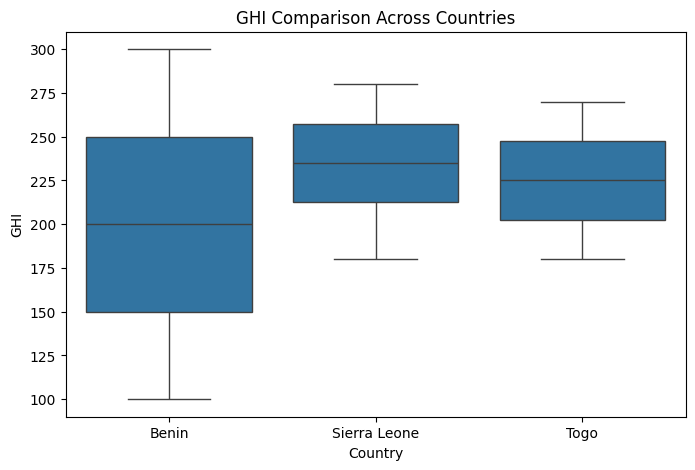


Summary Statistics:
                GHI                       DNI                     DHI         \
               mean median         std   mean median        std  mean median   
Country                                                                        
Benin         200.0  200.0  100.000000    NaN    NaN        NaN   NaN    NaN   
Sierra Leone  234.0  235.0   32.041640    NaN    NaN        NaN   NaN    NaN   
Togo          225.0  225.0   30.276504  156.0  156.0  24.221203  69.0   69.0   

                        
                   std  
Country                 
Benin              NaN  
Sierra Leone       NaN  
Togo          6.055301  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot of GHI by Country
if 'GHI' in df_all.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y='GHI', data=df_all)
    plt.title('GHI Comparison Across Countries')
    plt.show()
else:
    print(" 'GHI' column not found. Skipping boxplot.")

#  Summary Table (only existing columns)
cols_to_summarize = [c for c in ['GHI','DNI','DHI'] if c in df_all.columns]

if cols_to_summarize:
    summary = df_all.groupby('Country')[cols_to_summarize].agg(['mean','median','std'])
    print("\nSummary Statistics:")
    print(summary)
else:
    print("None of the columns ['GHI','DNI','DHI'] exist in df_all.")


## Statistical Testing

✅ Loading data for Benin: data\benin-malanville.csv
✅ Loading data for Sierra Leone: data\sierraleone-bumbuna.csv
✅ Loading data for Togo: data\togo-dapaong_qc.csv

✅ All files found. Proceeding with analysis...

📊 ANOVA F-statistic: 0.714
📈 ANOVA p-value: 0.50194


C:\Users\hakima\AppData\Local\Temp\ipykernel_3648\1196120801.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=df_all, palette='Set2')


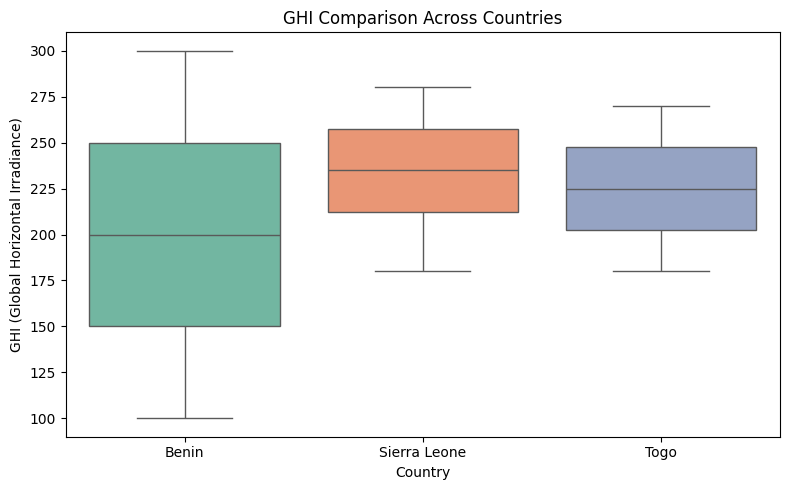

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import os
# Define file paths
data_dir = "data"
files = {
    "Benin": os.path.join(data_dir, "benin-malanville.csv"),
    "Sierra Leone": os.path.join(data_dir, "sierraleone-bumbuna.csv"),
    "Togo": os.path.join(data_dir, "togo-dapaong_qc.csv")
}
# Check files and load data
dfs = {}
for country, path in files.items():
    if not os.path.exists(path):
        print(f" File not found for {country}: {path}")
    else:
        print(f" Loading data for {country}: {path}")
        dfs[country] = pd.read_csv(path)

# If any file is missing, list all available ones
if len(dfs) < 3:
    print("\n⚠️ Missing one or more CSV files. Available files in 'data/' are:")
    print(os.listdir(data_dir))
    print("\nPlease check filenames or copy missing files to the 'data/' folder.")
else:
    print("\n✅ All files found. Proceeding with analysis...\n")

    # Ensure 'GHI' exists in all datasets
    for country, df in dfs.items():
        if 'GHI' not in df.columns:
            raise KeyError(f"'GHI' column not found in {country} dataset.")

    # Drop missing GHI values
    benin_ghi = dfs['Benin']['GHI'].dropna()
    sierra_ghi = dfs['Sierra Leone']['GHI'].dropna()
    togo_ghi = dfs['Togo']['GHI'].dropna()
    # Run one-way ANOVA
    f_stat, p_val = f_oneway(benin_ghi, sierra_ghi, togo_ghi)
    print(f"📊 ANOVA F-statistic: {f_stat:.3f}")
    print(f"📈 ANOVA p-value: {p_val:.5f}")
    # Visualization
    dfs['Benin']['Country'] = 'Benin'
    dfs['Sierra Leone']['Country'] = 'Sierra Leone'
    dfs['Togo']['Country'] = 'Togo'

    df_all = pd.concat(dfs.values(), ignore_index=True)

    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y='GHI', data=df_all, palette='Set2')
    plt.title('GHI Comparison Across Countries')
    plt.xlabel('Country')
    plt.ylabel('GHI (Global Horizontal Irradiance)')
    plt.tight_layout()
    plt.show()
